# Reading the data

In [1]:
# importing various libraries required for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
carprice = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
carprice.shape

(205, 26)

In [6]:
# Splitting car Name and retaining only Car company

carprice[['CarCompany','CarModel','Car1','Car2','Car3']]= carprice.CarName.str.split(expand=True)
carprice = carprice.drop(['CarName','CarModel','Car1','Car2','Car3'], axis=1)
carprice.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [7]:
# Replacing same values with different spellings or in lower case with single value
mapping_dict = {
"CarCompany": {
"nissan": "Nissan",
"maxda": "mazda",
"porcshce": "porsche",
"toyouta": "toyota",
"vokswagen": "volkswagen"
}
}
carprice = carprice.replace(mapping_dict)
carprice.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


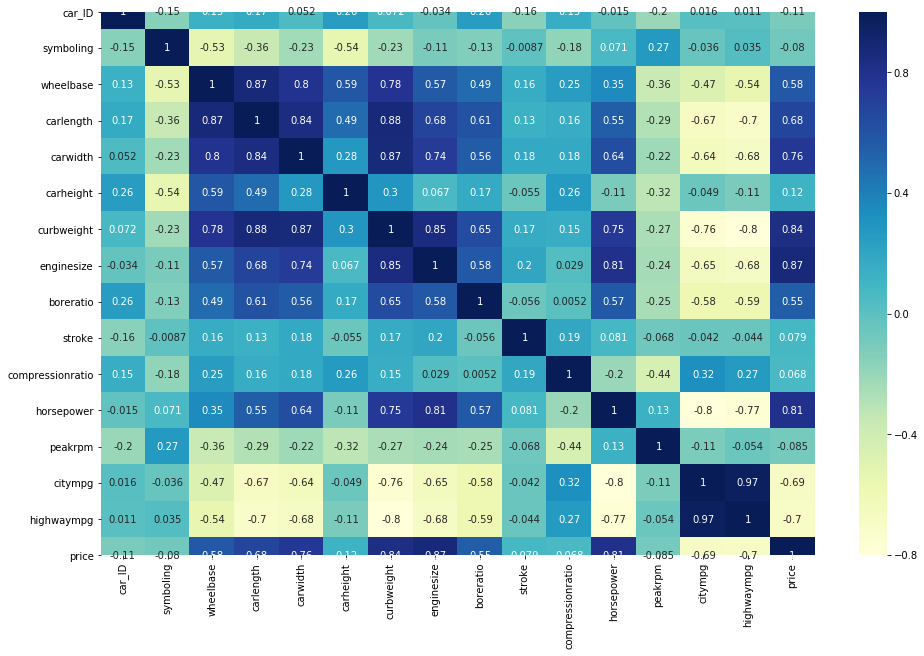

In [8]:
# plot the heatmap based on the correlation

plt.figure(figsize=(16,10))
sns.heatmap(carprice.corr(), annot = True , cmap='YlGnBu')

In [9]:
# dropping insignificant columns that is irrelevant to the price of the car
col = ['car_ID', 'symboling', 'stroke' , 'compressionratio', 'peakrpm']
carprice = carprice.drop(col , axis=1)

In [10]:
carprice.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,CarCompany
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romero
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,alfa-romero
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,ohc,four,109,mpfi,3.19,102,24,30,13950.0,audi
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,ohc,five,136,mpfi,3.19,115,18,22,17450.0,audi


In [11]:
# carbody , drivewheel , enginetype , cylindernumber, fuelsystem
carprice.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [12]:
# Categorical columns
#col1 = ['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'carbody' , 'drivewheel' , 'enginetype' , 'cylindernumber', 'fuelsystem']

In [13]:
carprice.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,104.117073,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,39.544167,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,48.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,70.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,95.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,116.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,288.000000,49.000000,54.000000,45400.000000


# Visualising the data (Numeric Columns)

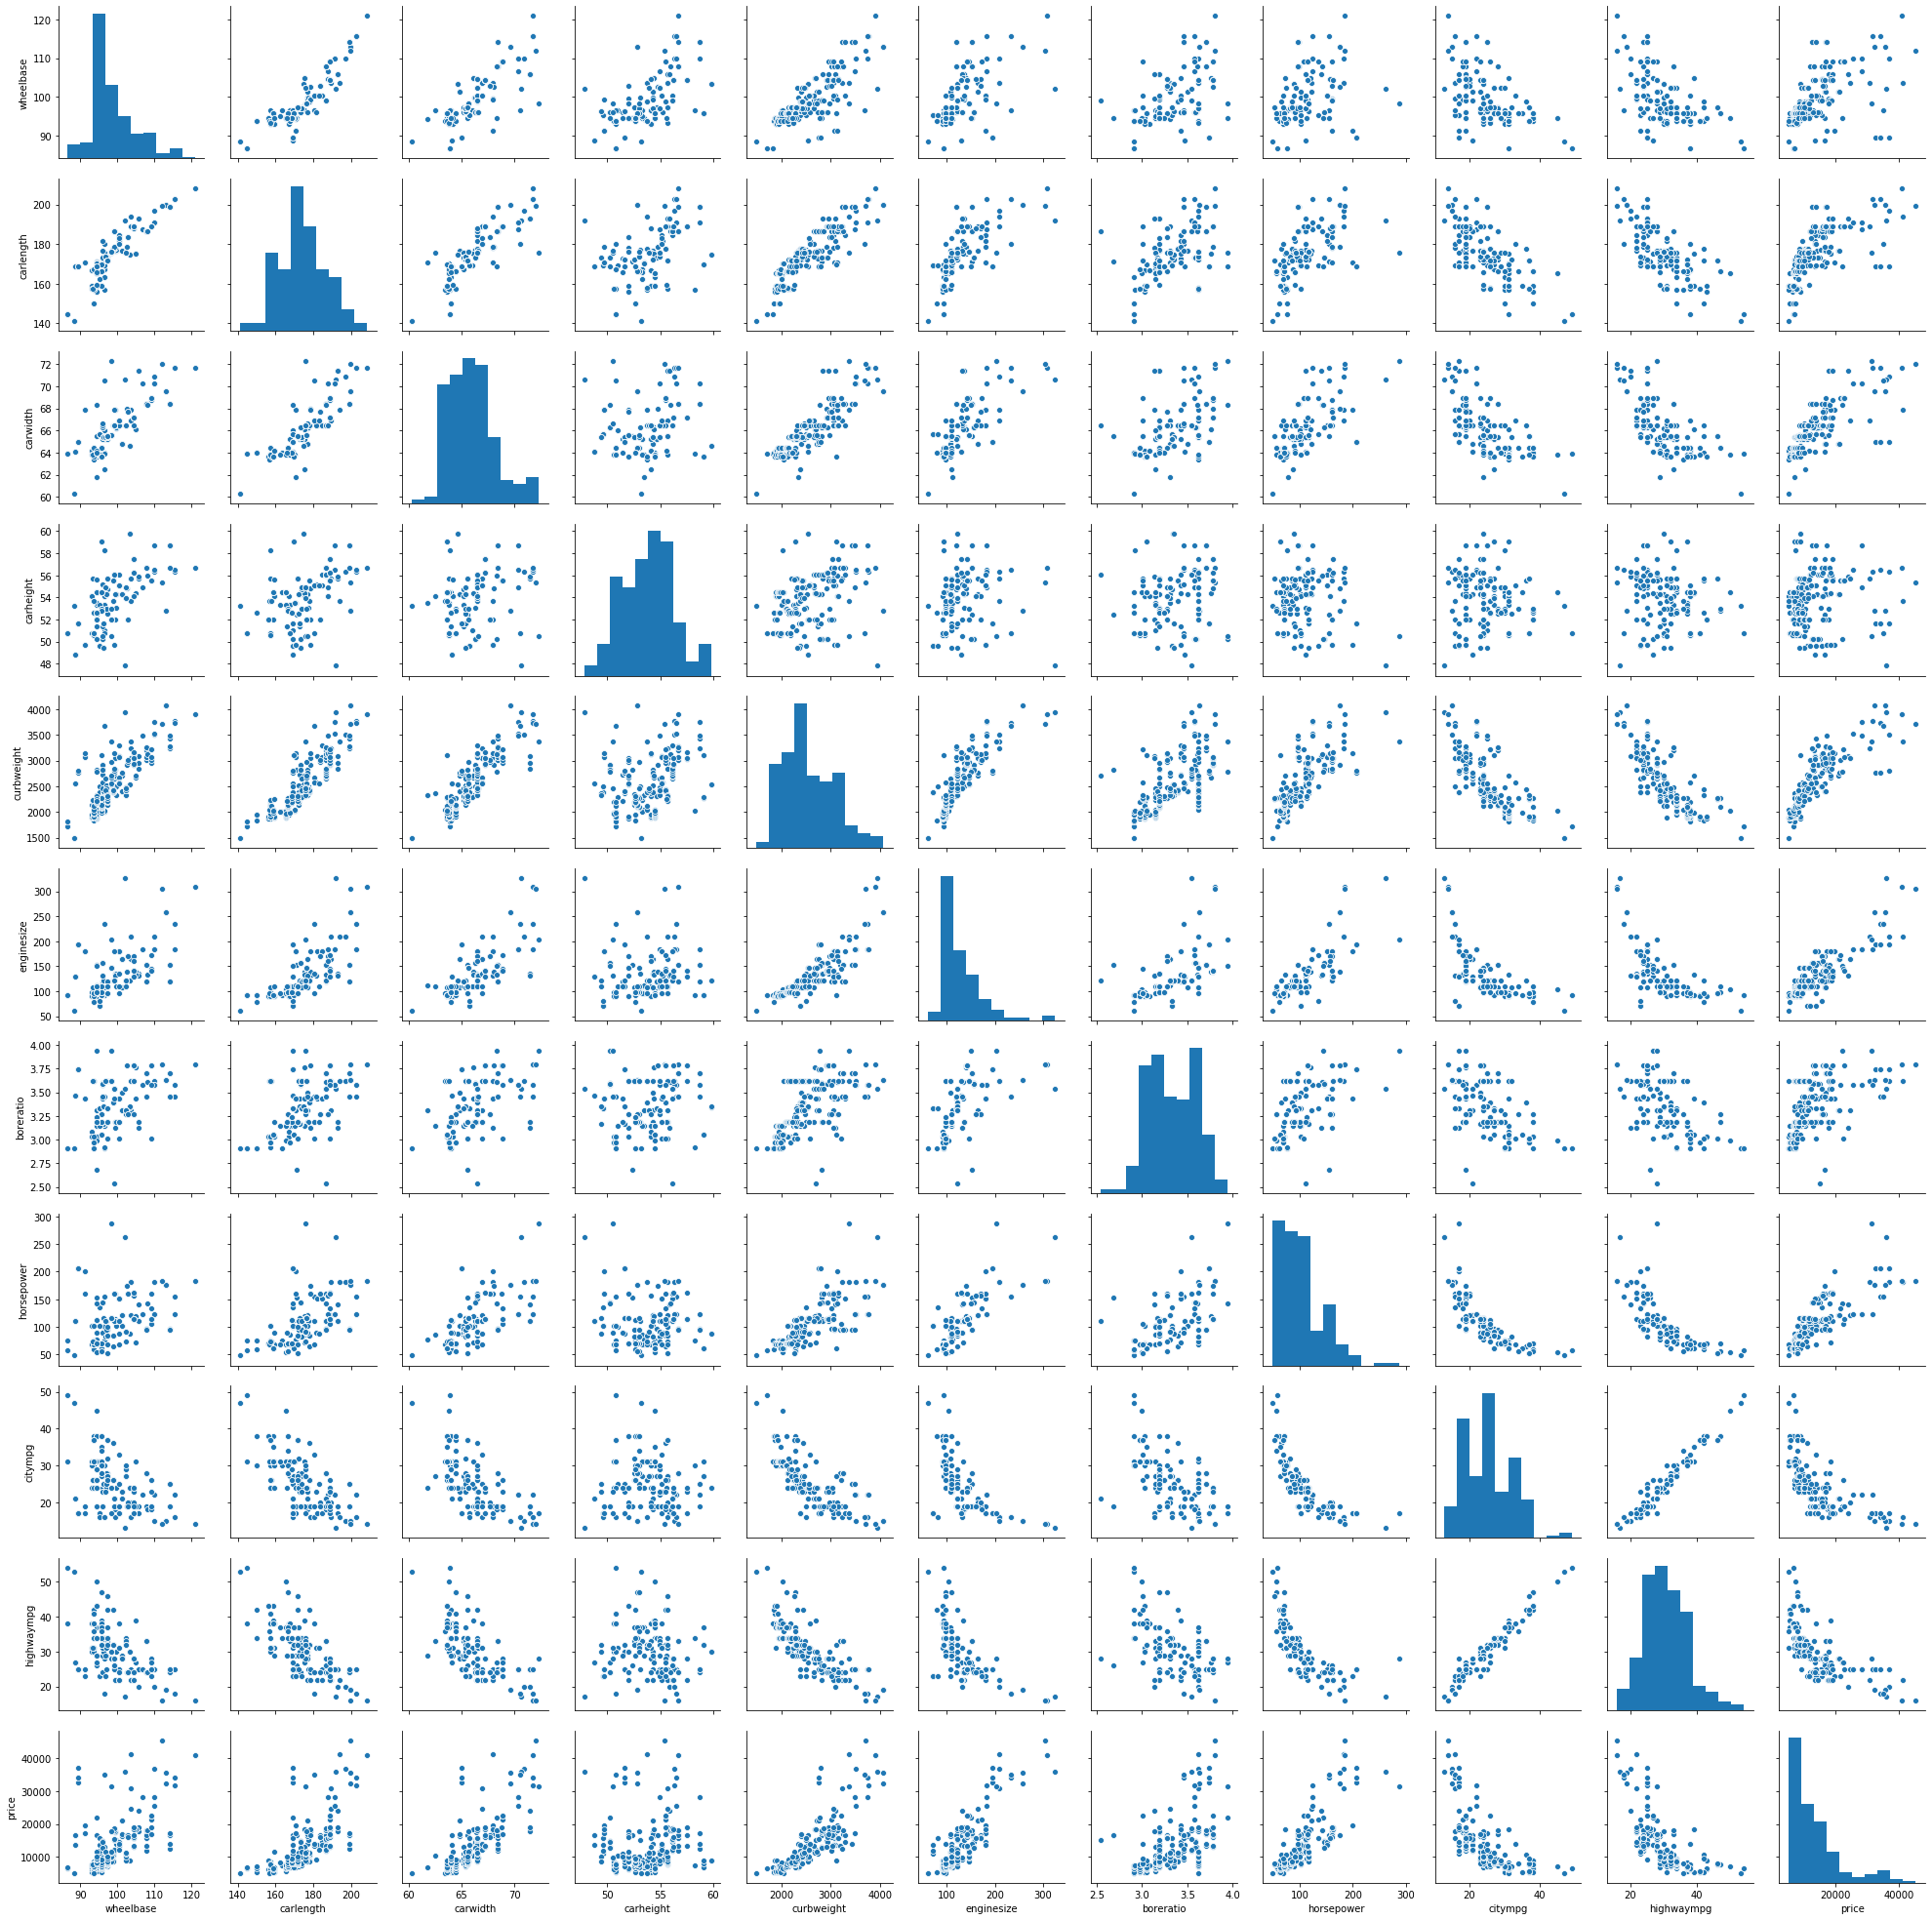

In [14]:
# plotting pair plot
sns.pairplot(carprice)

# Visualizing categorial columns :- col1 = ['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'carbody' , 'drivewheel' , 'enginetype' , 'cylindernumber', 'fuelsystem']

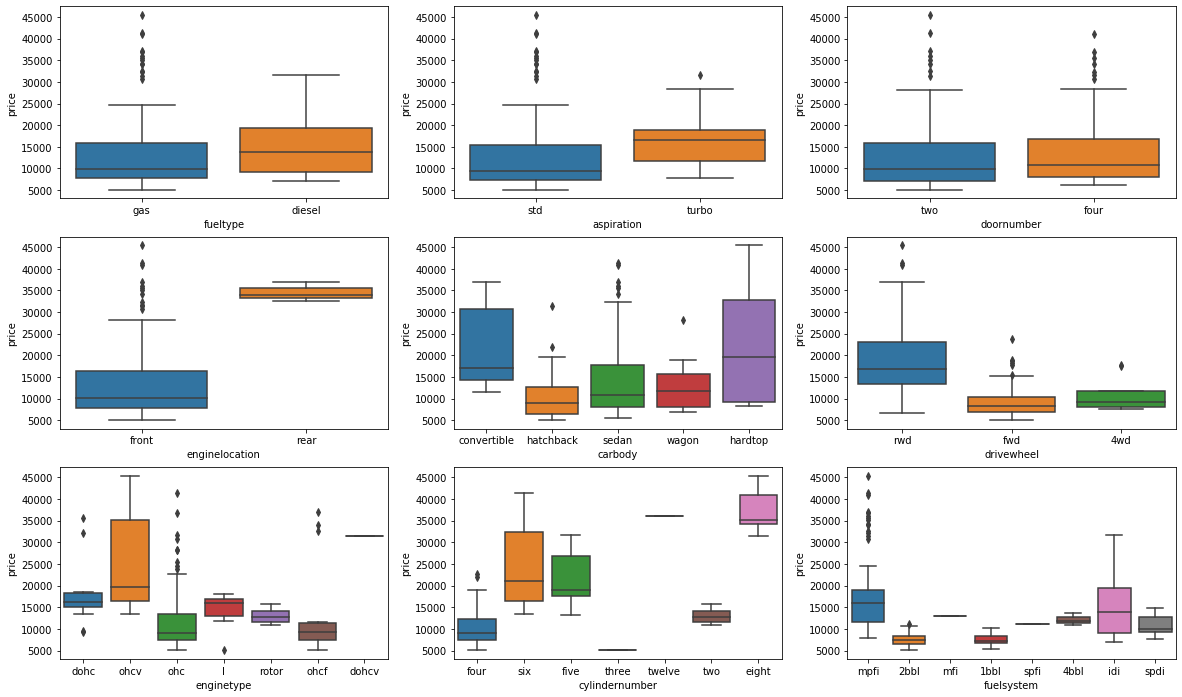

In [15]:
# col1 = ['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'carbody' , 'drivewheel' , 'enginetype' , 'cylindernumber', 'fuelsystem']
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(3,3,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(3,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)

plt.show()

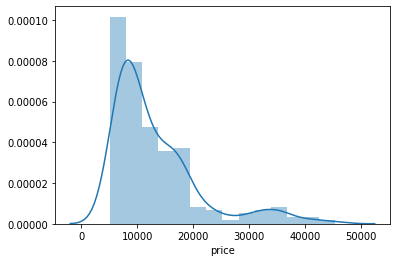

In [16]:
# plot of price distribution
sns.distplot(carprice['price'])

# Preparing for Data Modelling

In [17]:
# Converting columns having only two type of values to 0 and 1. Columns are :fueltype, aspiration, doornumber and enginelocation
carprice['fueltype'] = carprice['fueltype'].map({'gas':0 , 'diesel':1})
carprice['aspiration'] = carprice['aspiration'].map({'std':0 , 'turbo':1})
carprice['doornumber'] = carprice['doornumber'].map({'two':0 , 'four':1})
carprice['enginelocation'] = carprice['enginelocation'].map({'front':0 , 'rear':1})

In [18]:
carprice.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,CarCompany
0,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,...,dohc,four,130,mpfi,3.47,111,21,27,13495.0,alfa-romero
1,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,...,dohc,four,130,mpfi,3.47,111,21,27,16500.0,alfa-romero
2,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,...,ohcv,six,152,mpfi,2.68,154,19,26,16500.0,alfa-romero
3,0,0,1,sedan,fwd,0,99.8,176.6,66.2,54.3,...,ohc,four,109,mpfi,3.19,102,24,30,13950.0,audi
4,0,0,1,sedan,4wd,0,99.4,176.6,66.4,54.3,...,ohc,five,136,mpfi,3.19,115,18,22,17450.0,audi


# Dummy Variables

In [19]:
col_dummy = ['carbody' , 'drivewheel' , 'enginetype' , 'cylindernumber', 'fuelsystem', 'CarCompany']
dummy_df = pd.get_dummies(carprice[col_dummy])
carprice = pd.concat([carprice , dummy_df], axis=1)
carprice = carprice.drop(col_dummy, axis=1)

In [20]:
carprice.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo,CarCompany_vw
0,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,0,0,0,0


In [21]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 68 columns):
fueltype                  205 non-null int64
aspiration                205 non-null int64
doornumber                205 non-null int64
enginelocation            205 non-null int64
wheelbase                 205 non-null float64
carlength                 205 non-null float64
carwidth                  205 non-null float64
carheight                 205 non-null float64
curbweight                205 non-null int64
enginesize                205 non-null int64
boreratio                 205 non-null float64
horsepower                205 non-null int64
citympg                   205 non-null int64
highwaympg                205 non-null int64
price                     205 non-null float64
carbody_convertible       205 non-null uint8
carbody_hardtop           205 non-null uint8
carbody_hatchback         205 non-null uint8
carbody_sedan             205 non-null uint8
carbody_wagon             20

In [22]:
carprice.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo,CarCompany_vw
0,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,0,0,0,0


# Splitting into train and test

In [23]:
carprice_train, carprice_test=train_test_split(carprice, train_size=0.7, random_state=100)

In [24]:
print(carprice_train.shape)
print(carprice_test.shape)

(143, 68)
(62, 68)


# Scaling

In [25]:
# wheelbase	carlength	carwidth	carheight	curbweight	enginesize boreratio horsepower citympg highwaympg price

# 1. Instantiate an object of MinMaxScaler
scaler= MinMaxScaler()
# numeric variables that needs to be scaled
num_vars =['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']

# Fit on data

carprice_train[num_vars] = scaler.fit_transform(carprice_train[num_vars])
import warnings
warnings.filterwarnings('ignore')


C:\Users\Prateek Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Prateek Singh\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Training the model

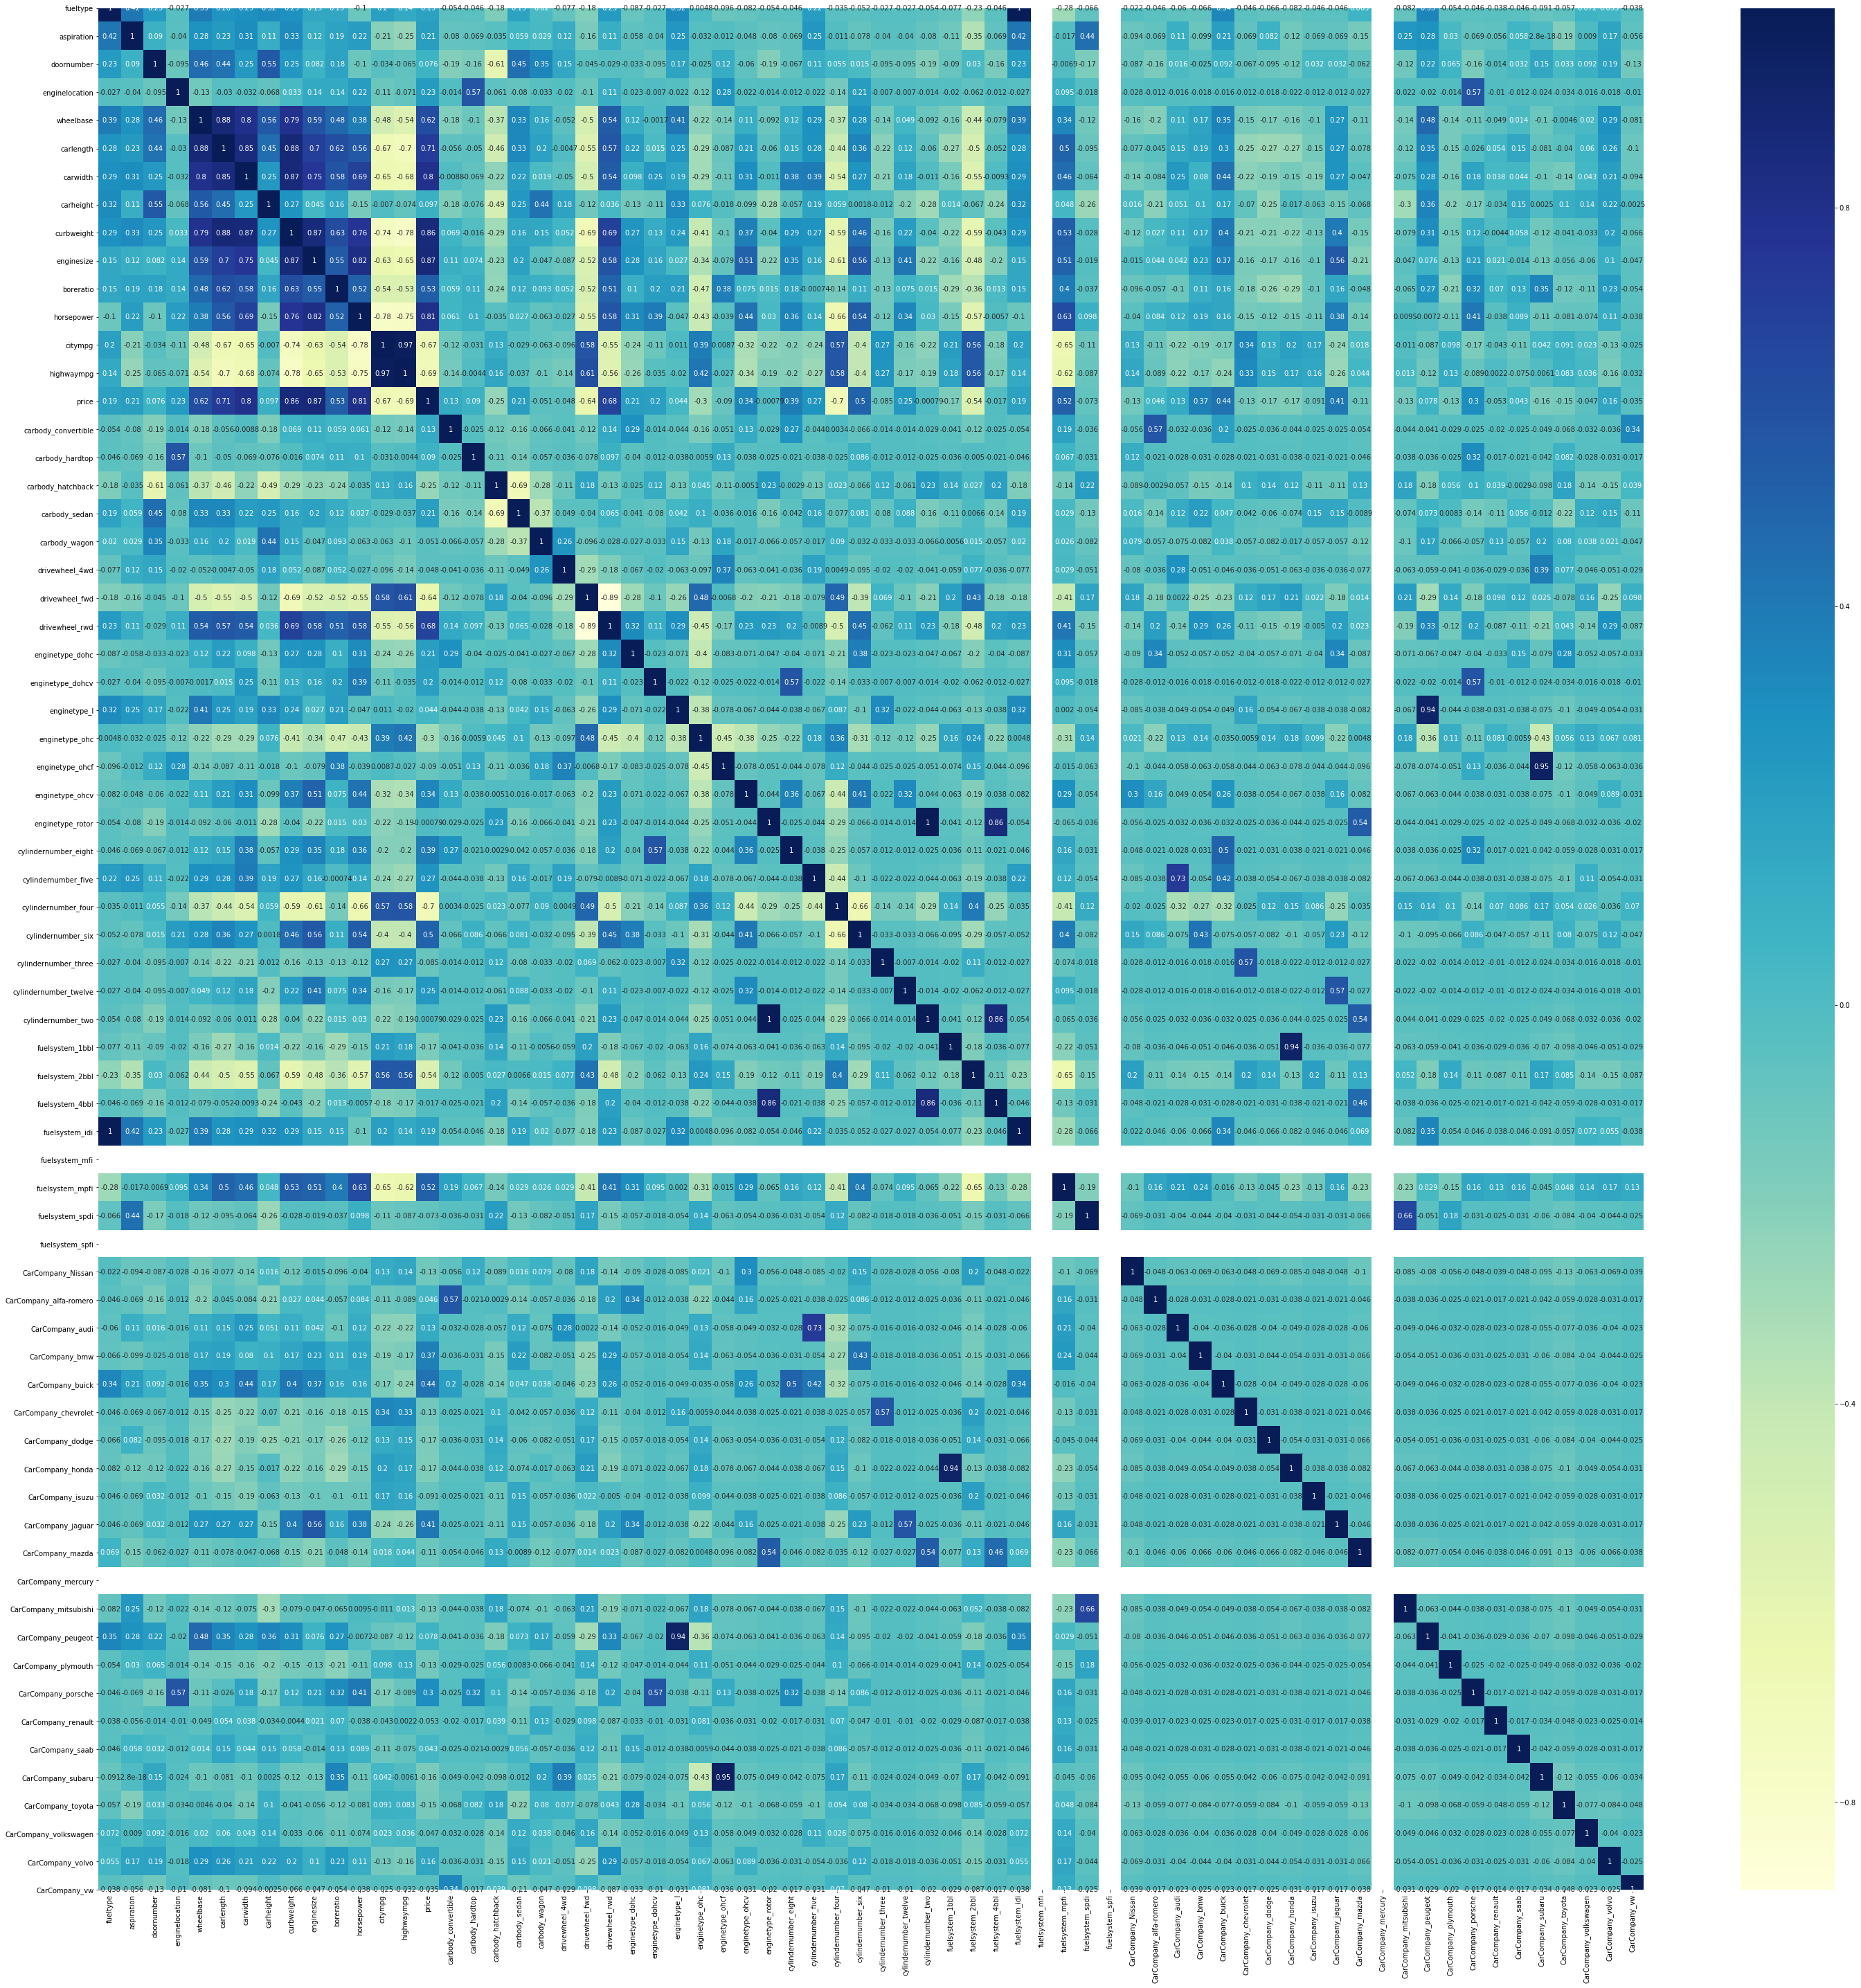

In [26]:
# plot the correlation between the training dataset
plt.figure(figsize=(50,50))
sns.heatmap(carprice_train.corr(), annot=True, cmap = 'YlGnBu')

In [27]:
# X_train and y_train
y_train = carprice_train.pop('price')
X_train = carprice_train

# RFE

In [28]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train , y_train)

rfe = RFE(lm , 15)  #running rfe
rfe.fit(X_train , y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [29]:
list(zip(X_train.columns , rfe.support_ , rfe.ranking_))

[('fueltype', False, 39),
 ('aspiration', False, 20),
 ('doornumber', False, 48),
 ('enginelocation', True, 1),
 ('wheelbase', False, 4),
 ('carlength', False, 7),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('citympg', False, 30),
 ('highwaympg', True, 1),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 32),
 ('carbody_hatchback', False, 28),
 ('carbody_sedan', False, 42),
 ('carbody_wagon', False, 35),
 ('drivewheel_4wd', False, 45),
 ('drivewheel_fwd', False, 38),
 ('drivewheel_rwd', False, 46),
 ('enginetype_dohc', False, 24),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 14),
 ('enginetype_ohc', False, 23),
 ('enginetype_ohcf', False, 5),
 ('enginetype_ohcv', False, 25),
 ('enginetype_rotor', False, 2),
 ('cylindernumber_eight', False, 22),
 ('cylindernumber_five', False, 9),
 ('cylindernumber_four', False, 10),
 ('cylindernumber_six', True, 1),


In [30]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'highwaympg', 'carbody_convertible', 'enginetype_dohcv',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'CarCompany_bmw', 'CarCompany_porsche'],
      dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'citympg', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CarCompany_Nissan',
       'CarCompany_alfa-romero', 'CarCompany_audi', 'CarCompany_buick',
       'CarCompany_chevrolet', 'CarCompany_dodge', 'CarCompany_honda',
       'CarCompany_isuzu', 'CarCompany_jaguar', 'CarCompany_mazda',
       'CarCompany_mercury', 'CarCompany_mitsubishi', 'CarCompany_peugeot',
       'CarCompany_plymouth', 'CarCompany_renault', 'CarCompany_saab',
       'C

# Build the Model using statsmodel, for the detailed statistics

In [32]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [33]:
# Adding a constant variables and creating the first model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train , X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     111.9
Date:                Sat, 30 May 2020   Prob (F-statistic):           1.60e-65
Time:                        22:16:49   Log-Likelihood:                 206.73
No. Observations:                 143   AIC:                            -381.5
Df Residuals:                     127   BIC:                            -334.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.22

In [34]:
X_train_nw = X_train_rfe

In [35]:
X_train_nw = X_train_nw.drop(['const'] , axis=1)

# VIF

In [36]:
# create a dataframe that will contain the names of all the feature variables and their respective VIF
vif = pd.DataFrame()
X= X_train_nw
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
2,curbweight,49.96
1,carwidth,40.12
3,enginesize,40.11
5,horsepower,18.07
4,boreratio,14.06
9,cylindernumber_six,3.95
6,highwaympg,3.71
14,CarCompany_porsche,3.30
8,enginetype_dohcv,2.41
11,cylindernumber_twelve,2.23


In [37]:
# Dropping highly correlated variables and insignificant variables
X_train_nw = X_train_nw.drop('curbweight', axis=1)
# Build a second fitted model
X_train_lm = sm.add_constant(X_train_nw)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     104.8
Date:                Sat, 30 May 2020   Prob (F-statistic):           5.94e-63
Time:                        22:16:49   Log-Likelihood:                 197.35
No. Observations:                 143   AIC:                            -364.7
Df Residuals:                     128   BIC:                            -320.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

In [38]:
vif = pd.DataFrame()
X= X_train_nw
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
2,enginesize,33.07
1,carwidth,26.03
4,horsepower,17.99
3,boreratio,12.92
8,cylindernumber_six,3.94
13,CarCompany_porsche,3.19
5,highwaympg,3.18
7,enginetype_dohcv,2.40
0,enginelocation,2.19
10,cylindernumber_twelve,2.15


In [39]:
# Dropping highly correlated variables and insignificant variables
X_train_nw = X_train_nw.drop('highwaympg', axis=1)
# Build a Third fitted model
X_train_lm = sm.add_constant(X_train_nw)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     113.8
Date:                Sat, 30 May 2020   Prob (F-statistic):           5.52e-64
Time:                        22:16:49   Log-Likelihood:                 197.34
No. Observations:                 143   AIC:                            -366.7
Df Residuals:                     129   BIC:                            -325.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.17

In [40]:
vif = pd.DataFrame()
X= X_train_nw
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
2,enginesize,32.21
1,carwidth,21.92
4,horsepower,16.37
3,boreratio,11.43
7,cylindernumber_six,3.89
12,CarCompany_porsche,3.17
6,enginetype_dohcv,2.37
0,enginelocation,2.15
9,cylindernumber_twelve,2.12
10,cylindernumber_two,1.45


In [41]:
# Dropping highly correlated variables and insignificant variables
X_train_nw = X_train_nw.drop('enginesize', axis=1)
# Build a Fourth fitted model
X_train_lm = sm.add_constant(X_train_nw)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     82.91
Date:                Sat, 30 May 2020   Prob (F-statistic):           8.04e-55
Time:                        22:16:49   Log-Likelihood:                 171.24
No. Observations:                 143   AIC:                            -316.5
Df Residuals:                     130   BIC:                            -278.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.20

In [42]:
vif = pd.DataFrame()
X= X_train_nw
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
3,horsepower,14.61
1,carwidth,14.42
2,boreratio,10.57
11,CarCompany_porsche,3.16
6,cylindernumber_six,2.86
5,enginetype_dohcv,2.36
0,enginelocation,2.15
8,cylindernumber_twelve,1.46
10,CarCompany_bmw,1.34
4,carbody_convertible,1.09


In [43]:
# Dropping highly correlated variables and insignificant variables
X_train_nw = X_train_nw.drop('cylindernumber_two', axis=1)
# Build a Fifth fitted model
X_train_lm = sm.add_constant(X_train_nw)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     90.85
Date:                Sat, 30 May 2020   Prob (F-statistic):           9.82e-56
Time:                        22:16:50   Log-Likelihood:                 171.04
No. Observations:                 143   AIC:                            -318.1
Df Residuals:                     131   BIC:                            -282.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.20

In [44]:
vif = pd.DataFrame()
X= X_train_nw
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
1,carwidth,14.35
3,horsepower,14.25
2,boreratio,10.57
10,CarCompany_porsche,3.15
6,cylindernumber_six,2.80
5,enginetype_dohcv,2.36
0,enginelocation,2.15
8,cylindernumber_twelve,1.44
9,CarCompany_bmw,1.34
4,carbody_convertible,1.09


In [45]:
# Dropping highly correlated variables and insignificant variables
X_train_nw = X_train_nw.drop('boreratio', axis=1)
# Build a Sixth fitted model
X_train_lm = sm.add_constant(X_train_nw)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     100.3
Date:                Sat, 30 May 2020   Prob (F-statistic):           1.21e-56
Time:                        22:16:50   Log-Likelihood:                 170.78
No. Observations:                 143   AIC:                            -319.6
Df Residuals:                     132   BIC:                            -287.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.21

In [46]:
vif = pd.DataFrame()
X= X_train_nw
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
2,horsepower,13.46
1,carwidth,8.29
9,CarCompany_porsche,3.11
5,cylindernumber_six,2.54
4,enginetype_dohcv,2.27
0,enginelocation,2.14
7,cylindernumber_twelve,1.38
8,CarCompany_bmw,1.30
3,carbody_convertible,1.08
6,cylindernumber_three,1.00


In [47]:
# Dropping highly correlated variables and insignificant variables
X_train_nw = X_train_nw.drop('cylindernumber_six', axis=1)
# Build a Seventh fitted model
X_train_lm = sm.add_constant(X_train_nw)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     111.1
Date:                Sat, 30 May 2020   Prob (F-statistic):           2.05e-57
Time:                        22:16:50   Log-Likelihood:                 170.11
No. Observations:                 143   AIC:                            -320.2
Df Residuals:                     133   BIC:                            -290.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.21

In [48]:
vif = pd.DataFrame()
X= X_train_nw
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
2,horsepower,8.63
1,carwidth,6.85
8,CarCompany_porsche,3.06
4,enginetype_dohcv,2.16
0,enginelocation,2.12
6,cylindernumber_twelve,1.21
7,CarCompany_bmw,1.13
3,carbody_convertible,1.05
5,cylindernumber_three,1.00


In [49]:
# Dropping highly correlated variables and insignificant variables
X_train_nw = X_train_nw.drop('CarCompany_porsche', axis=1)
# Build a Eigth fitted model
X_train_lm = sm.add_constant(X_train_nw)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     125.3
Date:                Sat, 30 May 2020   Prob (F-statistic):           2.33e-58
Time:                        22:16:50   Log-Likelihood:                 169.81
No. Observations:                 143   AIC:                            -321.6
Df Residuals:                     134   BIC:                            -295.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.21

In [50]:
vif = pd.DataFrame()
X= X_train_nw
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
2,horsepower,8.58
1,carwidth,6.84
4,enginetype_dohcv,1.25
6,cylindernumber_twelve,1.21
0,enginelocation,1.18
7,CarCompany_bmw,1.13
3,carbody_convertible,1.05
5,cylindernumber_three,1.00


In [51]:
# Dropping highly correlated variables and insignificant variables
X_train_nw = X_train_nw.drop('cylindernumber_twelve', axis=1)
# Build a Ninth fitted model
X_train_lm = sm.add_constant(X_train_nw)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     142.7
Date:                Sat, 30 May 2020   Prob (F-statistic):           3.68e-59
Time:                        22:16:51   Log-Likelihood:                 169.09
No. Observations:                 143   AIC:                            -322.2
Df Residuals:                     135   BIC:                            -298.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2179 

In [52]:
vif = pd.DataFrame()
X= X_train_nw
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
2,horsepower,7.25
1,carwidth,6.22
4,enginetype_dohcv,1.21
0,enginelocation,1.15
6,CarCompany_bmw,1.11
3,carbody_convertible,1.04
5,cylindernumber_three,1.00


In [53]:
# Dropping highly correlated variables and insignificant variables
X_train_nw = X_train_nw.drop('horsepower', axis=1)
# Build a Tenth fitted model
X_train_lm = sm.add_constant(X_train_nw)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     112.8
Date:                Sat, 30 May 2020   Prob (F-statistic):           2.64e-50
Time:                        22:16:51   Log-Likelihood:                 144.79
No. Observations:                 143   AIC:                            -275.6
Df Residuals:                     136   BIC:                            -254.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2392 

In [54]:
vif = pd.DataFrame()
X= X_train_nw
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
1,carwidth,1.12
5,CarCompany_bmw,1.05
2,carbody_convertible,1.03
3,enginetype_dohcv,1.03
0,enginelocation,1.00
4,cylindernumber_three,1.00


In [55]:
# Dropping highly correlated variables and insignificant variables
X_train_nw = X_train_nw.drop('enginetype_dohcv', axis=1)
# Build a Eleventh fitted model
X_train_lm = sm.add_constant(X_train_nw)

lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     136.3
Date:                Sat, 30 May 2020   Prob (F-statistic):           2.25e-51
Time:                        22:16:51   Log-Likelihood:                 144.74
No. Observations:                 143   AIC:                            -277.5
Df Residuals:                     137   BIC:                            -259.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2406 

In [56]:
vif = pd.DataFrame()
X= X_train_nw
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
1,carwidth,1.08
4,CarCompany_bmw,1.05
2,carbody_convertible,1.03
0,enginelocation,1.00
3,cylindernumber_three,1.00


# Residual Analysis of the train data

In [57]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Error')

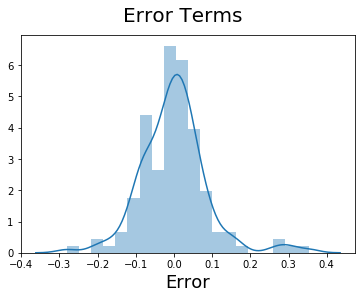

In [58]:
# Plot the histogram of error terms

fig = plt.figure()
sns.distplot((y_train-y_train_pred) , bins=20)
fig.suptitle('Error Terms' , fontsize = 20)
plt.xlabel('Error', fontsize = 18)

In [59]:
# Getting numeric colums for the test data, similar to train data
num_vars =['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']
carprice_test[num_vars] = scaler.transform(carprice_test[num_vars])

# Dividing into X_test and y_test

In [60]:
y_test = carprice_test.pop('price')
X_test = carprice_test

In [61]:
X_test_new = X_test[X_train_nw.columns]
X_test_new = sm.add_constant(X_test_new)

In [62]:
y_test_pred = lm.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_test_pred')

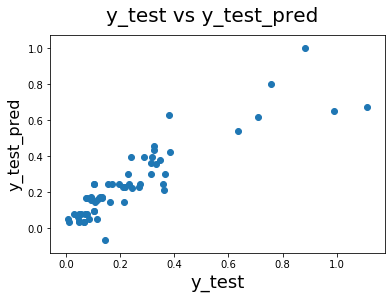

In [63]:
fig = plt.figure()
plt.scatter(y_test , y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize =18)
plt.ylabel('y_test_pred' , fontsize = 16)

# Printing r2 score

In [64]:
# evaluate
r2_score(y_true = y_test , y_pred= y_test_pred)

0.7925704045682301